In [1]:
import os
import cv2
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 50

#train/14a9a6b8-47ed-4698-96b7-9fdb5c701619/0/1.png
#train/84029aea-b710-4455-b14a-e099050bf556/5/Golden Wind1.png
#train/45e13cda-3651-4208-8cf1-6b49a0c5e859/7/lol.jpg
#train/30334761-6436-40a3-8114-4a6ed9cd754e/0/1.jpg

2


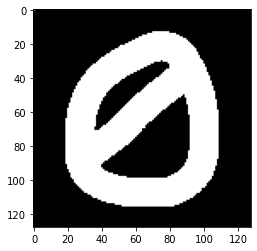

In [4]:
src_img = cv2.imread('train/6c495db5-efa5-452a-bc76-24485aaeda5e/0/1.jpg', cv2.IMREAD_UNCHANGED)
#src_img = cv2.Canny(src_img, 100, 200)
#src_img = cv2.Laplacian(src_img, cv2.CV_64F)
#src_img = (src_img - src_img.min()) / (src_img.max() - src_img.min())
#src_img[:,:] = src_img[:,:,3]
im_bw = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
if (im_bw == 0).all():
    im_bw = np.zeros((src_img.shape[0], src_img.shape[1]), np.uint8)
    im_bw[:, :] = (src_img.max(axis=2) > 0) * 255
    print('1')
else:
    _, im_bw = cv2.threshold(im_bw, im_bw.mean(), 255, cv2.THRESH_BINARY)
    if im_bw[-1, -1] == 255:
        im_bw = cv2.bitwise_not(im_bw)
    print('2')
plt.imshow(im_bw, cmap='gray')

In [15]:
re.sub(r'[А-я]+', '', 'train\45e13cda-3651-4208-8cf1-6b49a0c5e859\1\_0025_Слой-5.png')

'train%e13cda-3651-4208-8cf1-6b49a0c5e859\x01\\_0025_-5.png'

In [445]:
im_bw[im_bw > 0].mean()

255.0

In [366]:
src_img[:,20]

array([[  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,  

In [284]:
src_img[0, 0].all() == src_img[-1, -1].all()

True

In [326]:
src_img[:,20]

array([[  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,  

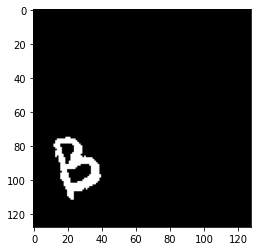

In [254]:
(thresh, im_bw) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
if im_bw[0,0] == 255:
    im_bw = cv2.bitwise_not(im_bw)
plt.imshow(im_bw, cmap='gray')

(39, 30)
Wall time: 17 ms


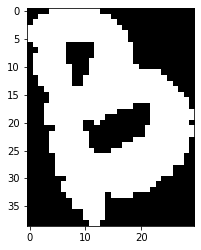

In [276]:
%%time
crop_left = 0
crop_right = 0
crop_up = 0
crop_down = 0
for i in range(im_bw.shape[1]):
    if im_bw[:,i].sum() != 0:
        crop_left = i
        break
for i in reversed(range(im_bw.shape[1])):
    if im_bw[:,i].sum() != 0:
        crop_right = i + 1
        break
for i in range(im_bw.shape[0]):
    if im_bw[i,:].sum() != 0:
        crop_up = i
        break
for i in reversed(range(im_bw.shape[0])):
    if im_bw[i,:].sum() != 0:
        crop_down = i + 1
        break
im_bw2 = im_bw[crop_up:crop_down, crop_left:crop_right]
print(im_bw2.shape)
plt.imshow(im_bw2, cmap='gray')

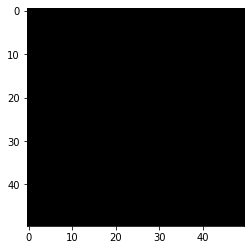

In [272]:
blank_image = np.zeros((N,N), np.uint8)
plt.imshow(blank_image, cmap='gray')

(50, 38)


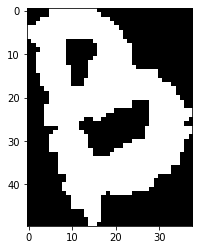

In [277]:
im_bw3 = cv2.resize(im_bw2, (N * im_bw2.shape[1] // max(im_bw2.shape), N * im_bw2.shape[0] // max(im_bw2.shape)), cv2.INTER_NEAREST)
im_bw3 = (im_bw3 > 200) * 255
plt.imshow(im_bw3, cmap='gray')
print(im_bw3.shape)

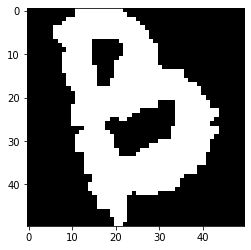

In [278]:
result_img = blank_image.copy()
offset_x = (N - im_bw3.shape[1]) // 2
offset_y = (N - im_bw3.shape[0]) // 2
result_img[offset_y:offset_y+im_bw3.shape[0], offset_x:offset_x+im_bw3.shape[1]] = im_bw3
plt.imshow(result_img, cmap='gray')